In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

#LECTURE DU fichier avec pandas
df=pd.read_csv("kc_house_data.csv",encoding="iso.8859-1")

#affichage des elements du tableau
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [64]:
# recherche des informations manquantes
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [65]:
# correlation
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split


features = ['bathrooms','sqft_living']
x = df['bathrooms'].values[:,np.newaxis]
y = df['price'].values

# separation des donnees en donnees de test et donnees d'entrainement
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)


# application de la regression lineaire
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

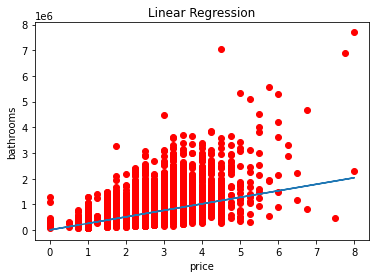

In [67]:
# representation graphique
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("bathrooms")
plt.xlabel("price")
plt.plot(x,model.predict(x))
plt.show()

In [68]:
# mesure de la performance
predicted=model.predict(x_test)

print("MSE",mean_squared_error(y_test,predicted))
print("R squared",metrics.r2_score(y_test,predicted))

MSE 91352317950.32463
R squared 0.27120098780529533


In [69]:
# application de  la regression multiple
columns = ['bathrooms','sqft_living','price']
df = df.loc[:, columns]
df.head(10)
features = ['bathrooms','sqft_living']
x = df.loc[:,features]
y = df['price'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)
print("train test:",x_train.shape)
print("test set :",x_test.shape)

train test: (17290, 2)
test set : (4323, 2)


In [70]:
# mesure de la performance
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE",mean_squared_error(y_test,predicted))
print("R squared",metrics.r2_score(y_test,predicted))

MSE 64175471200.03329
R squared 0.4880149615563447


on constate que la regression lineaire multiple a une valeur R_squared plus èlevè (48%) que la regression lineaire modele (27%).Donc la regression lineaire multiple est plus performant.

In [71]:
# pour la regression polynomiale
from sklearn.preprocessing import PolynomialFeatures


poly=PolynomialFeatures(degree=3)
x_train_=poly.fit_transform(x_train)
model.fit(x_train_,y_train)
x_test_=poly.fit_transform(x_test)
predicted=model.predict(x_test_)

print("MSE:",metrics.mean_squared_error(y_test,predicted))
print("R squared:",metrics.r2_score(y_test,predicted))

MSE: 58115251266.55365
R squared: 0.5363627473629874


on constate que pour la regression polynomiale R squared =53% donc elle est plus performant que la regression lineaire multiple